In [0]:
import pandas as pd
import numpy as np

In [0]:
# # Code to read csv file into Colaboratory:
# !pip install -U -q PyDrive
# !pip install xlrd

# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)


# link = 'https://drive.google.com/open?id=1nuINOYrsmFjo5_-UWkS1Dg5C4fQVN70T' # The shareable link

# fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='

In [0]:
# downloaded = drive.CreateFile({'id':id}) 
# downloaded.GetContentFile('subway.xlsx')  
# df3 = pd.read_excel('subway.xlsx')

In [0]:
# doc이 궁금하다면 출력해보세용~

In [0]:
import datetime
# 날 수 세는 함수
def date_to_VIP(date):
    date = date.split(' ')[0]
    year,month,day = date.split('-')
    year = int(year)
#     year_ = year-2000
    month = int(month)
    day = int(day)

    t = ['월', '화', '수', '목', '금', '토', '일']
    r = datetime.datetime(year,month,day).weekday()
    return t[r]


In [0]:
# '날짜'를 '요일'로 바꿉니다
doc['요일'] = doc['날짜'].apply(lambda x: date_to_VIP(str(x)))
doc.head(5)

,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계,요일
0,2018-01-01,1호선,150,서울역,승차,373,318,365,785,1047,...,3891,3227,2945,2382,3070,1750,781,96,40393,월
1,2018-01-01,1호선,150,서울역,하차,205,1040,872,984,1650,...,2845,2337,2131,1669,1404,868,477,147,34730,월
2,2018-01-01,1호선,151,시청,승차,87,105,124,197,291,...,1102,1278,1163,1032,975,553,214,9,12298,월
3,2018-01-01,1호선,151,시청,하차,47,294,497,1017,673,...,702,552,388,308,236,160,100,39,10945,월
4,2018-01-01,1호선,152,종각,승차,604,399,191,250,370,...,2172,2171,1873,1935,2084,1458,580,28,22621,월


In [0]:
# 다시 엑셀파일 읽어오면 시간이 오래걸려서 복사했어요
doc_week_df = doc.copy() # 복사
doc_week_df = doc_week_df[ doc_week_df['구분']=='승차' ] # 승차인것만 뽑아뽑아~
doc_week_df.drop(['구분','역명','역번호','호선','날짜','합 계'], axis=1, inplace=True) # 필요없는 컬럼 버렸어요~

doc_week_df.head(5) # 확인해볼까요~?

In [0]:
doc_week_groupby = doc_week_df.groupby('요일').mean() # '요일'로 묶어서 시간대 평균 구합니당당당
doc_week_groupby

,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01
요일,,,,,,,,,,,,,,,,,,,,
금,246.057413,512.287622,1534.051259,1905.200210,1066.998112,741.656993,745.868811,812.786853,876.638112,887.785664,1012.766853,1182.779161,1570.630629,2444.560210,1375.809021,956.758601,924.395804,874.728322,481.497762,100.963147
목,245.052937,520.760909,1556.821469,1919.407692,1081.919021,732.762587,727.663077,776.692168,831.532028,828.626084,933.044266,1102.535804,1439.950350,2270.600490,1261.873497,931.315664,949.684545,801.992587,375.134685,71.119161
수,241.435664,503.627762,1494.504825,1845.799720,1052.743916,729.350909,727.159441,780.537273,837.324196,835.728112,938.823287,1099.294685,1442.109860,2245.671259,1231.062657,912.734476,912.857273,762.637832,348.633636,62.978741
월,251.448439,535.739828,1548.179897,1827.860446,1026.467101,710.641509,713.008096,755.740789,802.457633,809.376261,915.783671,1062.877599,1364.674031,2222.314923,1264.034786,891.887479,852.183328,685.166518,308.048919,74.716089
일,143.845315,191.988881,247.717063,422.954056,564.621189,585.535315,600.652937,723.774615,787.401469,781.292797,814.299301,866.365105,849.187972,769.285105,640.640210,610.101329,564.846224,448.292587,177.705245,2.064476
토,226.578182,290.843427,432.847483,691.421469,774.941818,763.936364,873.220909,1003.869860,1070.376783,1054.618881,1095.086364,1216.994126,1259.517203,1070.410559,823.244965,778.106014,760.389580,687.490350,312.053776,5.244685
화,241.430420,510.649580,1514.898042,1846.260769,1054.788531,726.444126,721.463636,772.135874,829.905245,827.260839,923.647552,1088.239371,1403.786154,2215.078811,1256.618042,918.120490,906.563357,748.665874,337.509161,61.467203


In [0]:
week_labels = doc_week_groupby.index.values.tolist() # '요일'
time_labels = doc_week_groupby.columns.values.tolist() # '시간대'

doc_week_gb_T = doc_week_groupby.values.T # 전치행렬 -- numpy array
doc_week_gb_T = pd.DataFrame(doc_week_gb_T,columns=week_labels) # numpy array를 pandas DataFrame으로 변환합니다
doc_week_gb_T # 출력해볼까요~

,금,목,수,월,일,토,화
0,246.057413,245.052937,241.435664,251.448439,143.845315,226.578182,241.430420
1,512.287622,520.760909,503.627762,535.739828,191.988881,290.843427,510.649580
2,1534.051259,1556.821469,1494.504825,1548.179897,247.717063,432.847483,1514.898042
3,1905.200210,1919.407692,1845.799720,1827.860446,422.954056,691.421469,1846.260769
4,1066.998112,1081.919021,1052.743916,1026.467101,564.621189,774.941818,1054.788531
5,741.656993,732.762587,729.350909,710.641509,585.535315,763.936364,726.444126
6,745.868811,727.663077,727.159441,713.008096,600.652937,873.220909,721.463636
7,812.786853,776.692168,780.537273,755.740789,723.774615,1003.869860,772.135874
8,876.638112,831.532028,837.324196,802.457633,787.401469,1070.376783,829.905245
9,887.785664,828.626084,835.728112,809.376261,781.292797,1054.618881,827.260839


In [0]:
doc_week_gb_T["time"] = time_labels # 컬럼 추가합니다 -- seaborn 라이브러리 때문에 추가하게 됐습니당
doc_week_gb_T # 확인해볼까요~

,금,목,수,월,일,토,화,time
0,246.057413,245.052937,241.435664,251.448439,143.845315,226.578182,241.430420,05 ~ 06
1,512.287622,520.760909,503.627762,535.739828,191.988881,290.843427,510.649580,06 ~ 07
2,1534.051259,1556.821469,1494.504825,1548.179897,247.717063,432.847483,1514.898042,07 ~ 08
3,1905.200210,1919.407692,1845.799720,1827.860446,422.954056,691.421469,1846.260769,08 ~ 09
4,1066.998112,1081.919021,1052.743916,1026.467101,564.621189,774.941818,1054.788531,09 ~ 10
5,741.656993,732.762587,729.350909,710.641509,585.535315,763.936364,726.444126,10 ~ 11
6,745.868811,727.663077,727.159441,713.008096,600.652937,873.220909,721.463636,11 ~ 12
7,812.786853,776.692168,780.537273,755.740789,723.774615,1003.869860,772.135874,12 ~ 13
8,876.638112,831.532028,837.324196,802.457633,787.401469,1070.376783,829.905245,13 ~ 14
9,887.785664,828.626084,835.728112,809.376261,781.292797,1054.618881,827.260839,14 ~ 15


<class 'pandas.core.frame.DataFrame'>


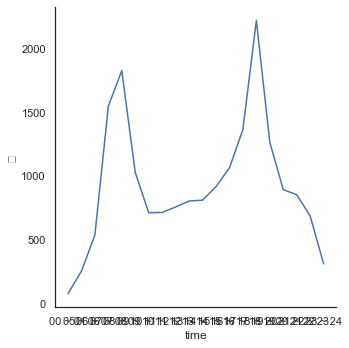

In [0]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white") # darkgrid  ## 여러 스타일이 있다고 하네요~
# color: "deep", "muted", "pastel", "bright", "dark", "colorblind".

sns.relplot(x="time", y="월", estimator=None, kind="line", data=doc_week_gb_T) # 그래프 그리는 함수는 한 줄~ 참 쉽죠?

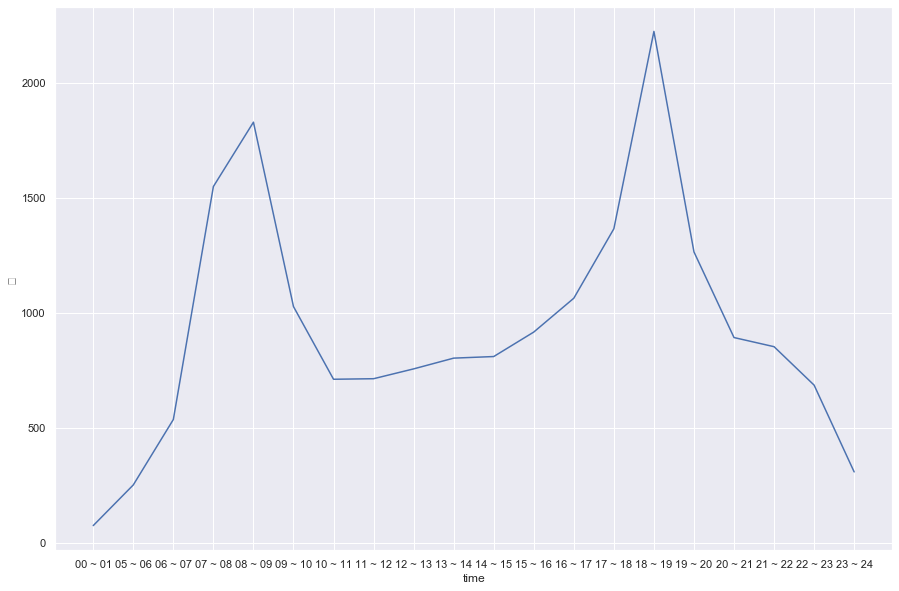

In [0]:
sns.lineplot(x="time", y="월", data=doc_week_gb_T)

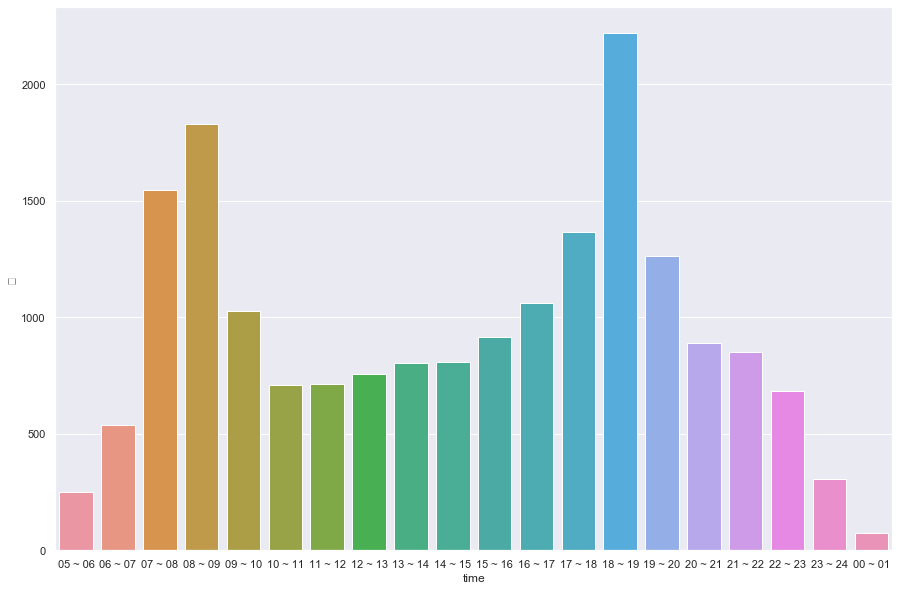

In [0]:
sns.set(style="darkgrid")
sns.barplot(x="time", y="월", data=doc_week_gb_T) # 화,수,목,금,토,일 -- y="월" 만 바꿔주면 그릴 수 있어요!

In [0]:
## 이번에는 '월'별로 그래프를 그려볼거에용

In [0]:
doc_month_df = doc.copy() # 복사
doc_month_df = doc_month_df[ doc_month_df['구분']=='승차' ] # 승차인것만
doc_month_df.head(5)

# 뭘할거냐면, 월별로 묶어볼거앰

,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계,요일
0,2018-01-01,1호선,150,서울역,승차,373,318,365,785,1047,...,3891,3227,2945,2382,3070,1750,781,96,40393,월
2,2018-01-01,1호선,151,시청,승차,87,105,124,197,291,...,1102,1278,1163,1032,975,553,214,9,12298,월
4,2018-01-01,1호선,152,종각,승차,604,399,191,250,370,...,2172,2171,1873,1935,2084,1458,580,28,22621,월
6,2018-01-01,1호선,153,종로3가,승차,282,211,133,233,320,...,1984,1620,1430,1206,1213,922,313,16,18698,월
8,2018-01-01,1호선,154,종로5가,승차,54,61,78,146,221,...,1061,991,773,505,402,296,85,8,10662,월


In [0]:
# 날짜에서 월 추출하고, groupby 월

In [0]:

# '월'로 변환하는 함수
def date_to_month(date):
    date = date.split(' ')[0]
    year,month,day = date.split('-')


    month = int(month)
    return str(month)+'월'
    

In [0]:
doc_month_df['월'] = doc_month_df['날짜'].apply(lambda x: date_to_month(str(x)))
doc_month_df.head(5)

,날짜,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,...,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계,요일,월
0,2018-01-01,1호선,150,서울역,승차,373,318,365,785,1047,...,3227,2945,2382,3070,1750,781,96,40393,월,1월
2,2018-01-01,1호선,151,시청,승차,87,105,124,197,291,...,1278,1163,1032,975,553,214,9,12298,월,1월
4,2018-01-01,1호선,152,종각,승차,604,399,191,250,370,...,2171,1873,1935,2084,1458,580,28,22621,월,1월
6,2018-01-01,1호선,153,종로3가,승차,282,211,133,233,320,...,1620,1430,1206,1213,922,313,16,18698,월,1월
8,2018-01-01,1호선,154,종로5가,승차,54,61,78,146,221,...,991,773,505,402,296,85,8,10662,월,1월


In [0]:
doc_month_df.drop(['구분','역명','역번호','호선','날짜','합 계','요일'], axis=1, inplace=True)

doc_month_df

,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,월
0,373,318,365,785,1047,1576,2510,3233,3145,2443,...,3476,3891,3227,2945,2382,3070,1750,781,96,1월
2,87,105,124,197,291,499,722,612,580,821,...,1027,1102,1278,1163,1032,975,553,214,9,1월
4,604,399,191,250,370,439,705,980,1153,1392,...,2127,2172,2171,1873,1935,2084,1458,580,28,1월
6,282,211,133,233,320,471,763,1075,1256,1546,...,1962,1984,1620,1430,1206,1213,922,313,16,1월
8,54,61,78,146,221,330,556,765,1030,1146,...,1026,1061,991,773,505,402,296,85,8,1월
10,150,143,168,286,445,535,591,730,896,1082,...,953,824,667,475,371,288,212,135,2,1월
12,141,136,191,249,380,518,522,581,588,628,...,682,628,447,297,278,197,170,78,9,1월
14,236,132,152,250,322,478,541,737,1002,1257,...,1323,1013,544,384,275,220,102,59,8,1월
16,200,230,266,412,642,780,983,1238,1274,1514,...,1818,1594,1215,1075,826,571,419,211,4,1월
18,46,80,80,73,186,241,392,567,774,1026,...,1242,917,397,213,139,116,70,35,8,1월


In [0]:
doc_month_groupby = doc_month_df.groupby('월').mean()
doc_month_groupby

,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01
월,,,,,,,,,,,,,,,,,,,,
10월,243.605161,455.678710,1255.940528,1567.419238,995.635543,749.809384,758.970792,833.421935,889.993548,892.533021,990.644106,1149.958592,1400.266979,1961.086569,1140.998123,872.150029,849.794839,714.597537,324.591202,50.278358
11월,238.089333,451.706061,1284.936970,1655.962545,1036.181939,756.135636,764.366788,839.765455,900.181697,899.244121,1003.138788,1175.891515,1474.738424,2051.211879,1149.789697,875.249939,863.322424,734.115273,342.538424,55.844727
12월,212.368094,392.204457,1075.969032,1425.901935,931.073900,733.828856,771.800587,843.868739,903.125513,920.780645,1014.543695,1162.683167,1409.876716,1831.120235,1070.736070,850.404106,851.103578,740.697595,360.390264,85.520821
1월,207.408094,410.874018,1132.526569,1481.906979,891.241056,655.537595,680.975249,759.129150,829.230147,825.295484,897.352727,998.942287,1245.638358,1911.650088,1123.627918,824.078123,799.489032,675.460645,314.160821,47.863930
2월,194.703636,383.857532,1051.862727,1372.349091,861.582208,656.906234,687.014156,770.878312,842.048312,845.194935,912.478442,1009.195974,1221.154286,1769.995195,1085.705974,806.038052,785.555714,663.850000,315.575325,50.190130
3월,225.259824,451.396129,1270.213021,1556.378182,985.000000,731.463343,749.914135,821.189443,890.217830,888.375601,982.450557,1143.434956,1375.247038,1950.621349,1194.612786,897.961994,886.113548,758.967742,350.483519,52.363402
4월,234.775636,477.731394,1303.408242,1592.324848,1004.379394,745.422788,750.443515,822.679636,883.028606,878.684242,966.162909,1112.871515,1347.992242,1955.100727,1188.324848,899.731152,881.798667,750.080121,345.609818,53.888364
5월,244.375601,468.753196,1236.275777,1531.710733,991.280938,747.117419,757.759296,831.113079,889.984985,890.033666,976.392023,1116.630499,1348.911437,1894.067801,1162.316364,900.945337,887.615836,763.379472,358.212551,55.609501
6월,249.906909,461.176727,1201.381576,1465.912606,944.565939,721.156364,735.753818,805.455030,861.909333,857.321697,942.850182,1093.077333,1304.762182,1834.539636,1109.956848,870.040242,843.010788,727.226788,349.486667,52.994667


In [0]:
month_labels = doc_month_groupby.index.values.tolist()
time_labels2 = doc_month_groupby.columns.values.tolist()
doc_month_gb_T = doc_month_groupby.values.T
doc_month_gb_T = pd.DataFrame(doc_month_gb_T,columns=month_labels)
doc_month_gb_T

,10월,11월,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월
0,243.605161,238.089333,212.368094,207.408094,194.703636,225.259824,234.775636,244.375601,249.906909,240.503695,224.371026,218.868970
1,455.678710,451.706061,392.204457,410.874018,383.857532,451.396129,477.731394,468.753196,461.176727,459.132903,434.021114,408.737455
2,1255.940528,1284.936970,1075.969032,1132.526569,1051.862727,1270.213021,1303.408242,1236.275777,1201.381576,1229.404575,1151.521525,1086.862667
3,1567.419238,1655.962545,1425.901935,1481.906979,1372.349091,1556.378182,1592.324848,1531.710733,1465.912606,1508.387097,1423.442815,1349.651879
4,995.635543,1036.181939,931.073900,891.241056,861.582208,985.000000,1004.379394,991.280938,944.565939,927.849971,890.112258,891.309576
5,749.809384,756.135636,733.828856,655.537595,656.906234,731.463343,745.422788,747.117419,721.156364,690.901935,673.983226,689.032485
6,758.970792,764.366788,771.800587,680.975249,687.014156,749.914135,750.443515,757.759296,735.753818,702.224868,687.424047,708.282303
7,833.421935,839.765455,843.868739,759.129150,770.878312,821.189443,822.679636,831.113079,805.455030,774.147566,754.669091,783.946061
8,889.993548,900.181697,903.125513,829.230147,842.048312,890.217830,883.028606,889.984985,861.909333,821.384516,796.377243,836.494424
9,892.533021,899.244121,920.780645,825.295484,845.194935,888.375601,878.684242,890.033666,857.321697,803.308035,785.653138,839.495273


In [0]:
doc_month_gb_T["time"] = time_labels2 # 컬럼 추가합니다 -- seaborn 라이브러리 때문에 추가하게 됐습니당

In [0]:
doc_month_gb_T

,10월,11월,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,time
0,243.605161,238.089333,212.368094,207.408094,194.703636,225.259824,234.775636,244.375601,249.906909,240.503695,224.371026,218.868970,05 ~ 06
1,455.678710,451.706061,392.204457,410.874018,383.857532,451.396129,477.731394,468.753196,461.176727,459.132903,434.021114,408.737455,06 ~ 07
2,1255.940528,1284.936970,1075.969032,1132.526569,1051.862727,1270.213021,1303.408242,1236.275777,1201.381576,1229.404575,1151.521525,1086.862667,07 ~ 08
3,1567.419238,1655.962545,1425.901935,1481.906979,1372.349091,1556.378182,1592.324848,1531.710733,1465.912606,1508.387097,1423.442815,1349.651879,08 ~ 09
4,995.635543,1036.181939,931.073900,891.241056,861.582208,985.000000,1004.379394,991.280938,944.565939,927.849971,890.112258,891.309576,09 ~ 10
5,749.809384,756.135636,733.828856,655.537595,656.906234,731.463343,745.422788,747.117419,721.156364,690.901935,673.983226,689.032485,10 ~ 11
6,758.970792,764.366788,771.800587,680.975249,687.014156,749.914135,750.443515,757.759296,735.753818,702.224868,687.424047,708.282303,11 ~ 12
7,833.421935,839.765455,843.868739,759.129150,770.878312,821.189443,822.679636,831.113079,805.455030,774.147566,754.669091,783.946061,12 ~ 13
8,889.993548,900.181697,903.125513,829.230147,842.048312,890.217830,883.028606,889.984985,861.909333,821.384516,796.377243,836.494424,13 ~ 14
9,892.533021,899.244121,920.780645,825.295484,845.194935,888.375601,878.684242,890.033666,857.321697,803.308035,785.653138,839.495273,14 ~ 15


C:\Users\sisi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


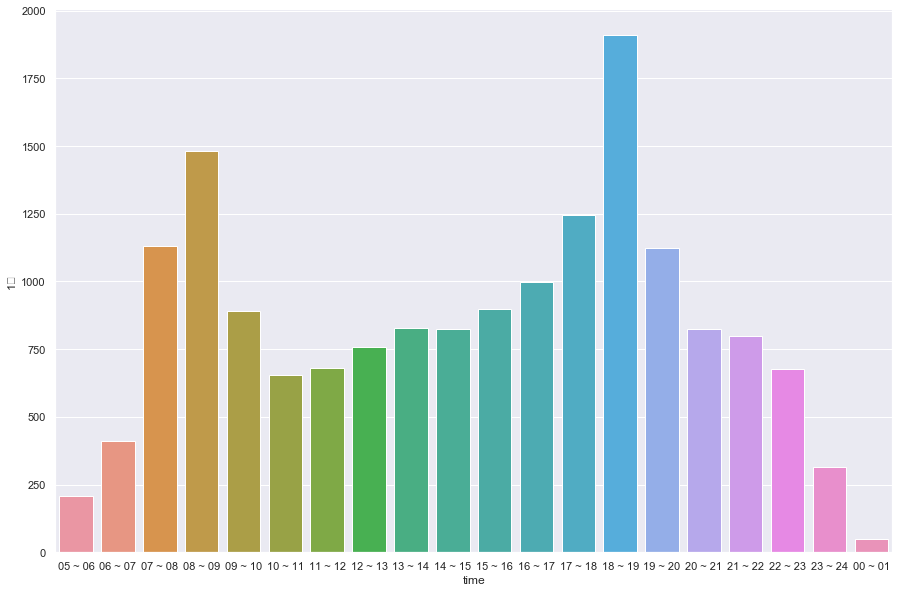

In [0]:
sns.barplot(x="time", y="1월", data=doc_month_gb_T) # '2월'.... 추가하면 됩니다!